tensor([[-0.60,  1.14, -0.77],
        [-0.74,  1.46, -1.09],
        [-0.48, -0.32, -0.21],
        [-0.92,  0.60, -0.62],
        [ 0.81, -0.36,  3.26],
        [ 0.72, -0.46,  1.06]], grad_fn=<EmbeddingBackward0>)
[['i', 'wonder', 'what', 'will', 'come', 'next'], ['this', 'is', 'a', 'basic', 'example', 'paragraph'], ['hello', 'what', 'is', 'a', 'basic', 'split']]


tensor([[[ 3.22, -0.01, -4.22],
         [ 1.92, -0.59,  0.23],
         [ 0.35,  1.11,  1.22],
         [-0.22, -0.42,  0.61],
         [ 0.26, -1.70, -2.75],
         [-1.85, -2.11, -1.24]],

        [[ 0.60,  0.87, -1.19],
         [ 0.71, -0.58,  0.79],
         [ 0.11,  2.21,  0.27],
         [ 1.61,  1.69, -2.18],
         [-0.03, -2.00,  0.71],
         [ 1.51, -0.10, -0.10]],

        [[-0.50, -2.62,  3.91],
         [ 0.35,  1.11,  1.22],
         [ 0.71, -0.58,  0.79],
         [ 0.11,  2.21,  0.27],
         [ 1.61,  1.69, -2.18],
         [ 0.77, -0.47,  0.17]]], grad_fn=<MulBackward0>)

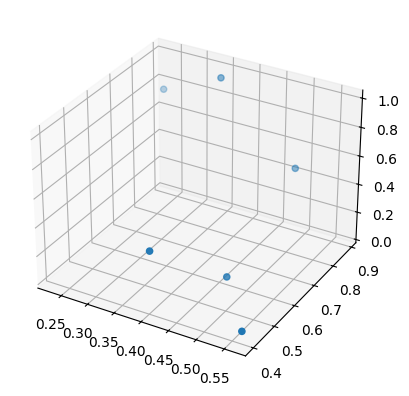

In [16]:
'''Word Embedding
'''

# importing required libraries
import math
import copy
import numpy as np

# torch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor

# visualization packages
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

example = "Hello! This is an example of a paragraph that has been split into its basic components. I wonder what will come next! Any guesses?"

def tokenize(sequence):
  # remove punctuation
  for punc in ["!", ".", "?", ","]:
    sequence = sequence.replace(punc, "")
  
  # split the sequence on spaces and lowercase each token
  return [token.lower() for token in sequence.split(" ")]

tokenize(example)

def build_vocab(data):
  # tokenize the data and remove duplicates
  vocab = list(set(tokenize(data)))

  # sort the vocabulary
  vocab.sort()

  # assign an integer to each word
  stoi = {word:i for i, word in enumerate(vocab)}

  return stoi

# build the vocab
stoi = build_vocab(example)

stoi 

sequence = [stoi[word] for word in tokenize("I wonder what will come next!")]
sequence

# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 3

# generate the embedding layer
embeddings = torch.rand(vocab_size, d_model) # matrix of size (24, 3)
embeddings

# embed the sequence
embedded_sequences = embeddings[sequence]

embedded_sequences

# visualize the embeddings in 3 dimensions
x, y, z = embedded_sequences[:, 0], embedded_sequences[:, 1], embedded_sequences[:, 2] 
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)  

# vocab size
vocab_size = len(stoi) # 24

# embedding dimensions
d_model = 3

# create the embeddings
lut = nn.Embedding(vocab_size, d_model) # look-up table (lut)

# view the embeddings
lut.state_dict()['weight']

indices = torch.Tensor(sequence).long()

embeddings = lut(indices)

print(embeddings)

class Embeddings(nn.Module):
  def __init__(self, vocab_size: int, d_model: int):
    """
    Args:
      vocab_size:     size of vocabulary
      d_model:        dimension of embeddings
    """
    # inherit from nn.Module
    super().__init__()   
     
    # embedding look-up table (lut)                          
    self.lut = nn.Embedding(vocab_size, d_model)   

    # dimension of embeddings 
    self.d_model = d_model                          

  def forward(self, x: Tensor):
    """
    Args:
      x:              input Tensor (batch_size, seq_length)
      
    Returns:
                      embedding vector
    """
    # embeddings by constant sqrt(d_model)
    return self.lut(x) * math.sqrt(self.d_model)  
  
lut = Embeddings(vocab_size, d_model)

lut(indices)

# list of sequences (3, )
sequences = ["I wonder what will come next!",
             "This is a basic example paragraph.",
             "Hello, what is a basic split?"]

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]
print(tokenized_sequences)

# index the sequences 
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# indexed_sequences

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

lut(tensor_sequences)

In [22]:
# Ref https://medium.com/@hunter-j-phillips/positional-encoding-7a93db4109e6

## Word Embedding

import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np

# set the output to 2 decimal places without scientific notation
torch.set_printoptions(precision=2, sci_mode=False)

# tokenize the sequences
tokenized_sequences = [tokenize(seq) for seq in sequences]

# index the sequences 
indexed_sequences = [[stoi[word] for word in seq] for seq in tokenized_sequences]

# convert the sequences to a tensor
tensor_sequences = torch.tensor(indexed_sequences).long()

# vocab size
vocab_size = len(stoi)

# embedding dimensions
d_model = 4

# create the embeddings
lut = nn.Embedding(vocab_size, d_model) # look-up table (lut)

# embed the sequence
embeddings = lut(tensor_sequences)

embeddings

tensor([[[ 2.42, -0.33, -0.10,  1.18],
         [ 2.46,  0.61,  1.34, -0.46],
         [ 0.50, -1.25,  0.12,  1.32],
         [-0.96, -0.15,  1.23,  0.67],
         [-0.21, -0.13,  1.10,  1.74],
         [ 0.57,  1.25, -1.44,  0.96]],

        [[-2.25,  0.12, -0.35, -0.04],
         [ 0.36,  0.80,  0.29, -0.46],
         [-0.89, -1.24, -0.73, -0.49],
         [-0.52,  1.23,  0.46, -1.63],
         [ 1.20,  0.93,  1.35, -0.25],
         [-0.49, -0.60, -1.38, -0.98]],

        [[-0.96,  0.80,  0.04, -0.79],
         [ 0.50, -1.25,  0.12,  1.32],
         [ 0.36,  0.80,  0.29, -0.46],
         [-0.89, -1.24, -0.73, -0.49],
         [-0.52,  1.23,  0.46, -1.63],
         [ 0.84,  1.44, -0.23,  0.60]]], grad_fn=<EmbeddingBackward0>)

In [18]:
def gen_pe(max_length, d_model, n):

  # generate an empty matrix for the positional encodings (pe)
  pe = np.zeros(max_length*d_model).reshape(max_length, d_model) 

  # for each position
  for k in np.arange(max_length):

    # for each dimension
    for i in np.arange(d_model//2):

      # calculate the internal value for sin and cos
      theta = k / (n ** ((2*i)/d_model))       

      # even dims: sin   
      pe[k, 2*i] = math.sin(theta) 

      # odd dims: cos               
      pe[k, 2*i+1] = math.cos(theta)

  return pe

# maximum sequence length
max_length = 10
n = 100
encodings = gen_pe(max_length, d_model, n)

In [25]:
# select the first six tokens
seq_length = embeddings.shape[1]
encodings[:seq_length]

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.09983342,  0.99500417],
       [ 0.90929743, -0.41614684,  0.19866933,  0.98006658],
       [ 0.14112001, -0.9899925 ,  0.29552021,  0.95533649],
       [-0.7568025 , -0.65364362,  0.38941834,  0.92106099],
       [-0.95892427,  0.28366219,  0.47942554,  0.87758256]])

In [56]:
pe_tensor = torch.tensor(encodings[:seq_length])
# print(embeddings.shape, encodings[:seq_length].shape)
# print(encodings[:seq_length])

print(embeddings)
print(pe_tensor.expand(3, 6, 4))
embeddings + pe_tensor.expand(3, 6, 4) # encodings[:6]

tensor([[[ 2.42, -0.33, -0.10,  1.18],
         [ 2.46,  0.61,  1.34, -0.46],
         [ 0.50, -1.25,  0.12,  1.32],
         [-0.96, -0.15,  1.23,  0.67],
         [-0.21, -0.13,  1.10,  1.74],
         [ 0.57,  1.25, -1.44,  0.96]],

        [[-2.25,  0.12, -0.35, -0.04],
         [ 0.36,  0.80,  0.29, -0.46],
         [-0.89, -1.24, -0.73, -0.49],
         [-0.52,  1.23,  0.46, -1.63],
         [ 1.20,  0.93,  1.35, -0.25],
         [-0.49, -0.60, -1.38, -0.98]],

        [[-0.96,  0.80,  0.04, -0.79],
         [ 0.50, -1.25,  0.12,  1.32],
         [ 0.36,  0.80,  0.29, -0.46],
         [-0.89, -1.24, -0.73, -0.49],
         [-0.52,  1.23,  0.46, -1.63],
         [ 0.84,  1.44, -0.23,  0.60]]], grad_fn=<EmbeddingBackward0>)
tensor([[[ 0.00,  1.00,  0.00,  1.00],
         [ 0.84,  0.54,  0.10,  1.00],
         [ 0.91, -0.42,  0.20,  0.98],
         [ 0.14, -0.99,  0.30,  0.96],
         [-0.76, -0.65,  0.39,  0.92],
         [-0.96,  0.28,  0.48,  0.88]],

        [[ 0.00,  1.00,  0

tensor([[[ 2.42,  0.67, -0.10,  2.18],
         [ 3.30,  1.15,  1.44,  0.53],
         [ 1.41, -1.67,  0.32,  2.30],
         [-0.82, -1.14,  1.52,  1.63],
         [-0.97, -0.78,  1.49,  2.66],
         [-0.38,  1.54, -0.96,  1.84]],

        [[-2.25,  1.12, -0.35,  0.96],
         [ 1.20,  1.34,  0.39,  0.54],
         [ 0.02, -1.65, -0.53,  0.49],
         [-0.38,  0.24,  0.75, -0.67],
         [ 0.44,  0.28,  1.74,  0.67],
         [-1.45, -0.31, -0.90, -0.10]],

        [[-0.96,  1.80,  0.04,  0.21],
         [ 1.34, -0.71,  0.22,  2.32],
         [ 1.27,  0.39,  0.48,  0.52],
         [-0.75, -2.23, -0.43,  0.46],
         [-1.27,  0.58,  0.85, -0.71],
         [-0.12,  1.72,  0.25,  1.48]]], dtype=torch.float64,
       grad_fn=<AddBackward0>)